Given the head of a linked list, reverse the nodes of the list k at a time, and return the modified list.

k is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of k then left-out nodes, in the end, should remain as it is.

You may not alter the values in the list's nodes, only nodes themselves may be changed.


Example 1:

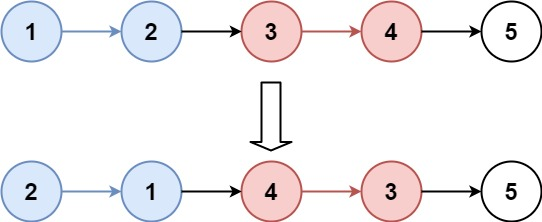

Input: head = [1,2,3,4,5], k = 2
Output: [2,1,4,3,5]

Example 2:

Input: head = [1,2,3,4,5], k = 3
Output: [3,2,1,4,5]

 

Constraints:

    The number of nodes in the list is n.
    1 <= k <= n <= 5000
    0 <= Node.val <= 1000

 

Follow-up: Can you solve the problem in O(1) extra memory space?


In [10]:
class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        # Edge Cases
        if not head or not head.next or k == 1: return head

        dummy = ListNode(-1, head)
        groupPrev = dummy
        while True:
            # Get kth node of the group
            kth = self.getKth(groupPrev, k)
            if not kth: break
            groupNext = kth.next

            # Reverse Group
            prev, curr = groupNext, groupPrev.next
            while curr != groupNext:
                curr.next, prev, curr = prev, curr, curr.next

            # Move groupPrev pointer to the next group position(node before next group)
            groupPrev.next, groupPrev = kth, groupPrev.next

        return dummy.next

    def getKth(self, curr: ListNode, k: int) -> ListNode:
        while curr and k > 0:
            curr = curr.next
            k -= 1
        return curr

In [11]:
from typing import Optional

# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        if not head:
            return
        
        nodes = []
        curr = head
        while curr is not None:
            nodes.append(curr)
            curr = curr.next
            
        for i in range(len(nodes) // k):
            nodes[i * k:(i + 1) * k] = nodes[i * k:(i + 1) * k][::-1]
        
        for i, node in enumerate(nodes[:-1]):
            node.next = nodes[i + 1]
        
        nodes[-1].next = None

        return nodes[0]

In [12]:
s = Solution()
s.reverseKGroup(ListNode(1, ListNode(2, ListNode(3, ListNode(4, ListNode(5))))), 3)